In [1]:
#fas-정재환
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import csv
import json
import seaborn as sns
%matplotlib inline 

In [2]:
#한글 폰트 적용 - 한글깨짐 방지
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# nrows를 이용해 csv파일에서 20만개의 데이터만 읽어온다
df = pd.read_csv('NHIS_OPEN_GJ_2017_2.csv', encoding='cp949', nrows=200000)
df

,번호,성별,연령,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,총콜레스테롤,흡연상태,음주여부
0,1,1,8,170,75,90.0,120.0,80.0,99.0,193.0,1.0,1.0
1,2,1,7,180,80,89.0,130.0,82.0,106.0,228.0,3.0,0.0
2,3,1,9,165,75,91.0,120.0,70.0,98.0,136.0,1.0,0.0
3,4,1,11,175,80,91.0,145.0,87.0,95.0,201.0,1.0,0.0
4,5,1,11,165,60,80.0,138.0,82.0,101.0,199.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,1,9,170,100,107.0,135.0,88.0,112.0,247.0,3.0,1.0
199996,199997,2,6,155,45,63.0,107.0,61.0,83.0,151.0,1.0,1.0
199997,199998,1,11,160,70,91.0,100.0,76.0,100.0,222.0,1.0,0.0
199998,199999,1,8,170,75,88.2,147.0,89.0,81.0,125.0,3.0,1.0


In [4]:
df['연령'] = df['연령'] * 5

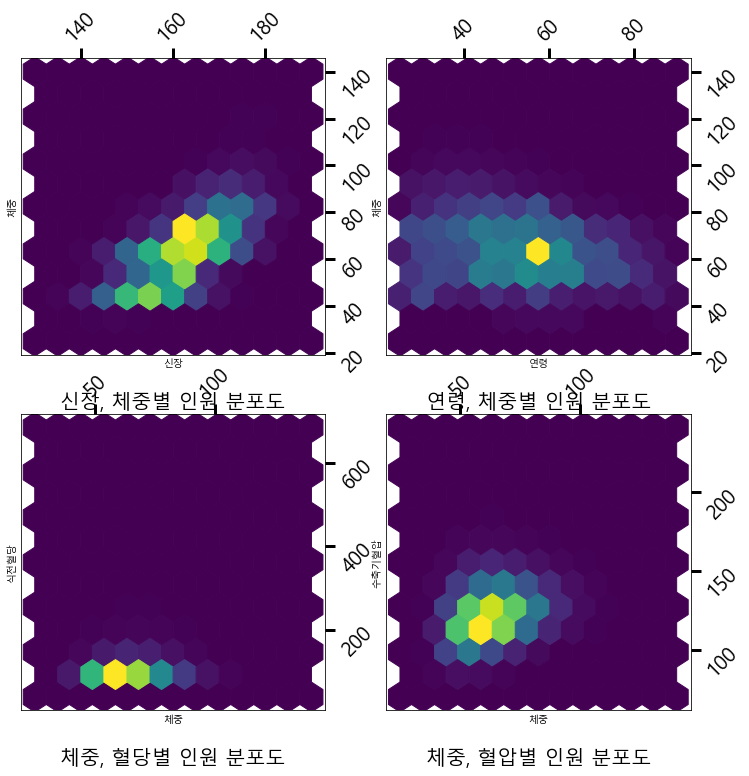

In [5]:
# (2, 2) 서브 플롯
# font_size를 이용한 라벨 텍스트 크기설정
# y속성을 이용해 title라벨의 y좌표 위치 설정
#tick_params를 이용해 x축 단위 라벨 크기 설정
#tick_params를 이용해 좌표의 단위 라벨 위치 설정
#tick_params의 location을 이용해 좌표의 단위 라벨 각도 설정
#tick_params의 axis를 이용해 x, y좌표중에 적용대상을 선택할 수 있다
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0,0].hexbin(x='신장', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,0].set_xlabel('신장')
ax[0,0].set_ylabel('체중')
ax[0,0].set_title('신장, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[0,1].hexbin(x='연령', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,1].set_xlabel('연령')
ax[0,1].set_ylabel('체중')
ax[0,1].set_title('연령, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,0].hexbin(x='체중', y='식전혈당', cmap='viridis', gridsize=12, data = df)
ax[1,0].set_xlabel('체중')
ax[1,0].set_ylabel('식전혈당')
ax[1,0].set_title('체중, 혈당별 인원 분포도', fontsize=20, y=-0.2)
ax[1,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,1].hexbin(x='체중', y='수축기혈압', cmap='viridis', gridsize=12, data = df)
ax[1,1].set_xlabel('체중')
ax[1,1].set_ylabel('수축기혈압')
ax[1,1].set_title('체중, 혈압별 인원 분포도', fontsize=20, y=-0.2)
ax[1,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

plt.show()

In [6]:
# 위 그래프에서는 4개의 서브 plot이 서로 라벨이 겹치는 현상이 생긴다

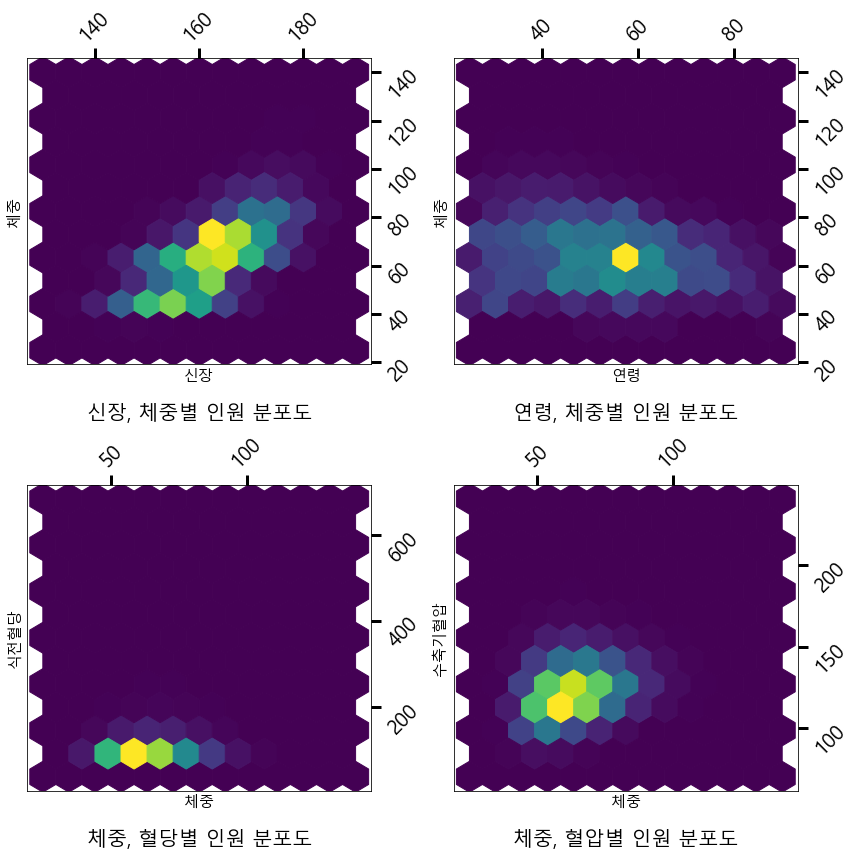

In [7]:
# tight_layout을 사용하여 서브 plot 간에 겹치는 현상을 방지한다

# (2, 2) 서브 플롯
# font_size를 이용한 라벨 텍스트 크기설정
# y속성을 이용해 title라벨의 y좌표 위치 설정
#tick_params를 이용해 x축 단위 라벨 크기 설정
#tick_params를 이용해 좌표의 단위 라벨 위치 설정
#tick_params의 location을 이용해 좌표의 단위 라벨 각도 설정
#tick_params의 axis를 이용해 x, y좌표중에 적용대상을 선택할 수 있다
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0,0].hexbin(x='신장', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,0].set_xlabel('신장', fontsize=15)
ax[0,0].set_ylabel('체중', fontsize=15)
ax[0,0].set_title('신장, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[0,1].hexbin(x='연령', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,1].set_xlabel('연령', fontsize=15)
ax[0,1].set_ylabel('체중', fontsize=15)
ax[0,1].set_title('연령, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,0].hexbin(x='체중', y='식전혈당', cmap='viridis', gridsize=12, data = df)
ax[1,0].set_xlabel('체중', fontsize=15)
ax[1,0].set_ylabel('식전혈당', fontsize=15)
ax[1,0].set_title('체중, 혈당별 인원 분포도', fontsize=20, y=-0.2)
ax[1,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,1].hexbin(x='체중', y='수축기혈압', cmap='viridis', gridsize=12, data = df)
ax[1,1].set_xlabel('체중', fontsize=15)
ax[1,1].set_ylabel('수축기혈압', fontsize=15)
ax[1,1].set_title('체중, 혈압별 인원 분포도', fontsize=20, y=-0.2)
ax[1,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

plt.tight_layout() # tight_layout을 사용하여 서브 plot 간에 겹치는 현상을 방지한다
plt.show()

In [8]:
# tight_layout을 사용한 결과 위와 같이 서브 plot간의 겹치는 현상이 사라졌다

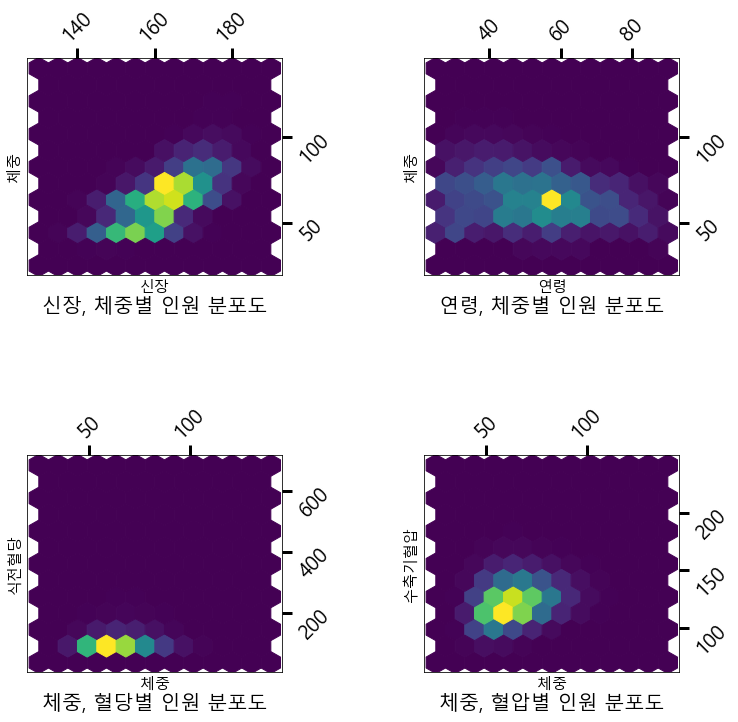

In [9]:
# tight_layout의 pad속성을 이용해 서브 plot간의 간격을 설정할 수 있다

# (2,2) 서브 플롯
# font_size를 이용한 라벨 텍스트 크기설정
# y속성을 이용해 title라벨의 y좌표 위치 설정
#tick_params를 이용해 x축 단위 라벨 크기 설정
#tick_params를 이용해 좌표의 단위 라벨 위치 설정
#tick_params의 location을 이용해 좌표의 단위 라벨 각도 설정
#tick_params의 axis를 이용해 x, y좌표중에 적용대상을 선택할 수 있다
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0,0].hexbin(x='신장', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,0].set_xlabel('신장', fontsize=15)
ax[0,0].set_ylabel('체중', fontsize=15)
ax[0,0].set_title('신장, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[0,1].hexbin(x='연령', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,1].set_xlabel('연령', fontsize=15)
ax[0,1].set_ylabel('체중', fontsize=15)
ax[0,1].set_title('연령, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,0].hexbin(x='체중', y='식전혈당', cmap='viridis', gridsize=12, data = df)
ax[1,0].set_xlabel('체중', fontsize=15)
ax[1,0].set_ylabel('식전혈당', fontsize=15)
ax[1,0].set_title('체중, 혈당별 인원 분포도', fontsize=20, y=-0.2)
ax[1,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,1].hexbin(x='체중', y='수축기혈압', cmap='viridis', gridsize=12, data = df)
ax[1,1].set_xlabel('체중', fontsize=15)
ax[1,1].set_ylabel('수축기혈압', fontsize=15)
ax[1,1].set_title('체중, 혈압별 인원 분포도', fontsize=20, y=-0.2)
ax[1,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

plt.tight_layout(pad=7) # tight_layout의 pad속성을 이용해 서브 plot간의 간격을 설정할 수 있다
plt.show()

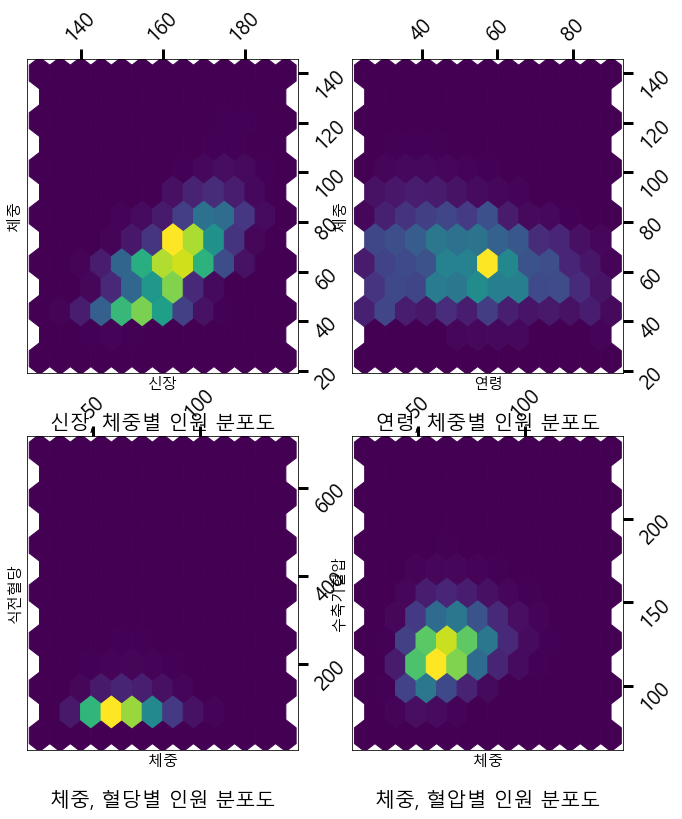

In [10]:
# subplots_adjust를 이용해 전체 plot을 하나로 묶어 상, 하, 좌, 우 간격 설정 

# font_size를 이용한 라벨 텍스트 크기설정
# y속성을 이용해 title라벨의 y좌표 위치 설정
#tick_params를 이용해 x축 단위 라벨 크기 설정
#tick_params를 이용해 좌표의 단위 라벨 위치 설정
#tick_params의 location을 이용해 좌표의 단위 라벨 각도 설정
#tick_params의 axis를 이용해 x, y좌표중에 적용대상을 선택할 수 있다
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0,0].hexbin(x='신장', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,0].set_xlabel('신장', fontsize=15)
ax[0,0].set_ylabel('체중', fontsize=15)
ax[0,0].set_title('신장, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[0,1].hexbin(x='연령', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,1].set_xlabel('연령', fontsize=15)
ax[0,1].set_ylabel('체중', fontsize=15)
ax[0,1].set_title('연령, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,0].hexbin(x='체중', y='식전혈당', cmap='viridis', gridsize=12, data = df)
ax[1,0].set_xlabel('체중', fontsize=15)
ax[1,0].set_ylabel('식전혈당', fontsize=15)
ax[1,0].set_title('체중, 혈당별 인원 분포도', fontsize=20, y=-0.2)
ax[1,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,1].hexbin(x='체중', y='수축기혈압', cmap='viridis', gridsize=12, data = df)
ax[1,1].set_xlabel('체중', fontsize=15)
ax[1,1].set_ylabel('수축기혈압', fontsize=15)
ax[1,1].set_title('체중, 혈압별 인원 분포도', fontsize=20, y=-0.2)
ax[1,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

# subplots_adjust를 이용해 전체 plot을 하나로 묶어 상, 하, 좌, 우 간격 설정 
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.3, right=0.99)
plt.show()

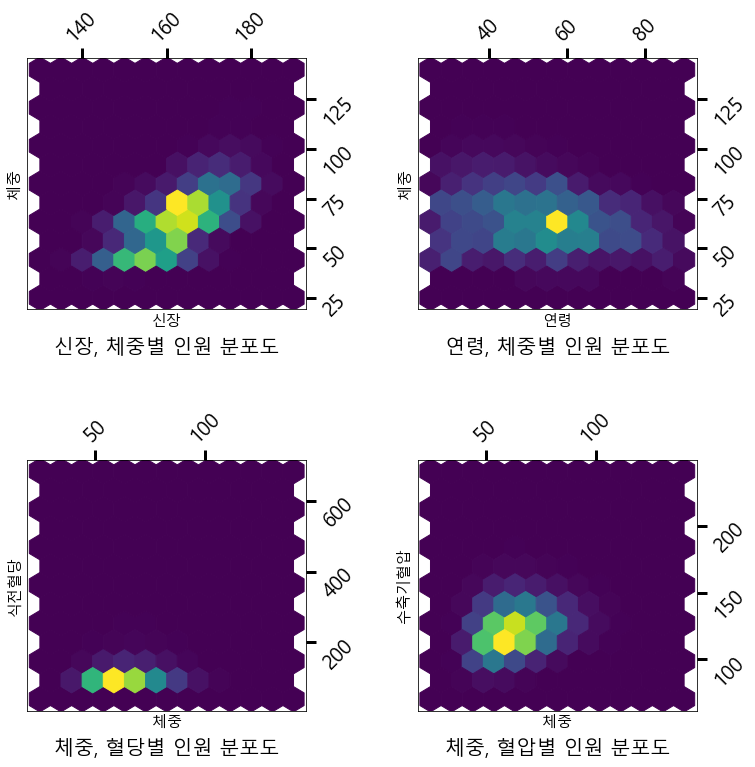

In [11]:
# subplots_adjust의 hspace, wspace속성을 사용해 서브plot간의 수평, 수직 간격 설정

# font_size를 이용한 라벨 텍스트 크기설정
# y속성을 이용해 title라벨의 y좌표 위치 설정
#tick_params를 이용해 x축 단위 라벨 크기 설정
#tick_params를 이용해 좌표의 단위 라벨 위치 설정
#tick_params의 location을 이용해 좌표의 단위 라벨 각도 설정
#tick_params의 axis를 이용해 x, y좌표중에 적용대상을 선택할 수 있다
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0,0].hexbin(x='신장', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,0].set_xlabel('신장', fontsize=15)
ax[0,0].set_ylabel('체중', fontsize=15)
ax[0,0].set_title('신장, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[0,1].hexbin(x='연령', y='체중', cmap='viridis', gridsize=12, data = df)
ax[0,1].set_xlabel('연령', fontsize=15)
ax[0,1].set_ylabel('체중', fontsize=15)
ax[0,1].set_title('연령, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax[0,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[0,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,0].hexbin(x='체중', y='식전혈당', cmap='viridis', gridsize=12, data = df)
ax[1,0].set_xlabel('체중', fontsize=15)
ax[1,0].set_ylabel('식전혈당', fontsize=15)
ax[1,0].set_title('체중, 혈당별 인원 분포도', fontsize=20, y=-0.2)
ax[1,0].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,0].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

ax[1,1].hexbin(x='체중', y='수축기혈압', cmap='viridis', gridsize=12, data = df)
ax[1,1].set_xlabel('체중', fontsize=15)
ax[1,1].set_ylabel('수축기혈압', fontsize=15)
ax[1,1].set_title('체중, 혈압별 인원 분포도', fontsize=20, y=-0.2)
ax[1,1].tick_params(axis='x', labelsize=20, bottom=False, labelbottom=False, top=True, labeltop=True,
              length=10, width=3, rotation=45)
ax[1,1].tick_params(axis='y', labelsize=20, left=False, labelleft=False, right=True, labelright=True, 
               length=10, width=3, rotation=45)

# subplots_adjust의 hspace, wspace속성을 사용해 서브plot간의 수평, 수직 간격 설정
fig.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

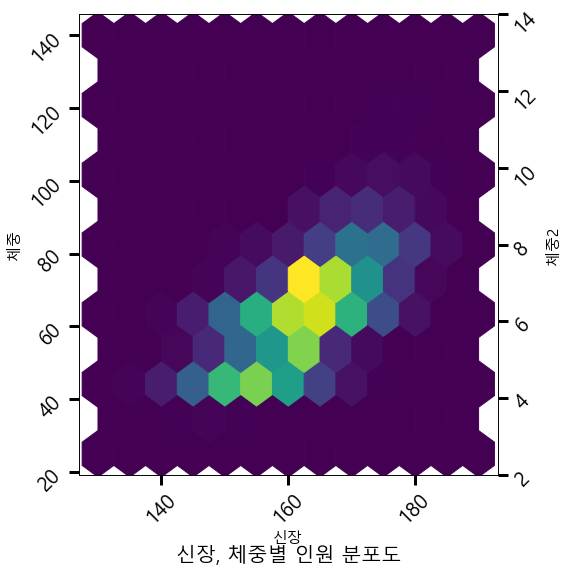

In [12]:
# add_subplot()을 사용해 서브 plot 생성
# twinx()를 사용해 x, y축의 라벨을 양방향에 모두 표시
# set_ylim()을 사용해 좌표 눈금의 최솟값과 최댓값 설정
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot() # add_subplot()을 사용해 서브 plot 생성
ax.hexbin(x='신장', y='체중', cmap='viridis', gridsize=12, data = df)
ax.set_xlabel('신장', fontsize=15)
ax.set_ylabel('체중', fontsize=15)
ax.set_title('신장, 체중별 인원 분포도', fontsize=20, y=-0.2)
ax.tick_params(axis='x', rotation=45, labelsize=20, length=10, width=3)
ax.tick_params(axis='y', rotation=45, labelsize=20, length=10, width=3)

ax2=ax.twinx() # twinx()를 사용해 x, y축의 라벨을 양방향에 모두 표시
ax2.set_ylim([2, 14])
ax2.set_ylabel('체중2', fontsize=15)
ax2.tick_params(axis='y', rotation=45, labelsize=20, length=10, width=3)

plt.tight_layout()
plt.show()